In [1]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [132]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8886 non-null   datetime64[ns]
 1   Demanda    8886 non-null   float64       
 2   VolUtil    8886 non-null   float64       
 3   Aportes    8886 non-null   float64       
 4   PrecioB    8886 non-null   float64       
 5   PrecioO    8886 non-null   float64       
 6   DispTer    8886 non-null   float64       
 7   DispNoTer  8886 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 555.5 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2002-01-01')
end_time = pd.to_datetime('2019-03-01')

In [6]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [7]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_14288\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_14288\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_14288\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
731,3.946067e+06,3.209119e+09,67906700.0,31.803940,202.582351,3.592417e+06,8.845565e+06,2002,1,1
732,4.635085e+06,3.199010e+09,63975700.0,29.596648,206.115583,3.592417e+06,8.829170e+06,2002,1,2
733,4.794566e+06,3.179709e+09,58573300.0,29.830982,189.376315,3.592375e+06,8.684235e+06,2002,1,3
734,4.923706e+06,3.160818e+09,56891000.0,30.064773,191.472726,3.490292e+06,8.831828e+06,2002,1,4
735,4.709901e+06,3.141576e+09,58442500.0,31.274773,189.559708,3.434647e+06,8.831455e+06,2002,1,5
...,...,...,...,...,...,...,...,...,...,...
6993,7.122057e+06,8.644510e+09,87179100.0,322.590895,370.304514,4.224538e+06,9.659271e+06,2019,2,24
6994,8.137477e+06,8.613842e+09,88485100.0,361.728695,371.224236,4.263101e+06,9.263221e+06,2019,2,25
6995,8.239534e+06,8.559566e+09,84367800.0,292.077995,358.720625,4.178875e+06,9.031502e+06,2019,2,26
6996,8.274899e+06,8.510944e+09,93936600.0,338.385517,362.446310,4.047174e+06,9.017892e+06,2019,2,27


In [9]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [10]:
print(X)

           Demanda       VolUtil     Aportes     PrecioO       DispTer  \
731   3.946067e+06  3.209119e+09  67906700.0  202.582351  3.592417e+06   
732   4.635085e+06  3.199010e+09  63975700.0  206.115583  3.592417e+06   
733   4.794566e+06  3.179709e+09  58573300.0  189.376315  3.592375e+06   
734   4.923706e+06  3.160818e+09  56891000.0  191.472726  3.490292e+06   
735   4.709901e+06  3.141576e+09  58442500.0  189.559708  3.434647e+06   
...            ...           ...         ...         ...           ...   
6994  8.137477e+06  8.613842e+09  88485100.0  371.224236  4.263101e+06   
6995  8.239534e+06  8.559566e+09  84367800.0  358.720625  4.178875e+06   
6996  8.274899e+06  8.510944e+09  93936600.0  362.446310  4.047174e+06   
6997  8.316201e+06  8.457132e+09  91820500.0  360.840755  4.060981e+06   
6998  8.334235e+06  8.391268e+09  80952600.0  370.978831  4.361869e+06   

         DispNoTer  year  month  day  
731   8.845565e+06  2002      1    1  
732   8.829170e+06  2002      1  

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [13]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.8000000000000002, 'n_estimators': 60}


In [92]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -26.387516128232456


In [93]:
grid_search.cv_results_

{'mean_fit_time': array([0.10456648, 0.24443383, 0.27240038, 0.37097483, 0.46184902,
        0.58296885, 0.685502  , 0.8602778 , 1.11381459, 1.30299053,
        1.15774894, 0.95283804, 1.13880372, 1.30956588, 1.49542556,
        1.42815704, 1.49285951, 1.79374804, 1.65611186, 0.07393355,
        0.16205101, 0.27186322, 0.33793559, 0.4862556 , 0.57605209,
        0.5929822 , 0.88884964, 0.83206758, 0.9281755 , 0.94305172,
        0.95117979, 1.12152462, 1.23500466, 1.41011362, 1.61139708,
        1.90421443, 1.97824783, 2.75478001, 0.12092733, 0.30942144,
        0.67048812, 0.59950695, 0.75395989, 0.95980954, 0.55744119,
        0.78460231, 0.84823112, 1.66126208, 1.48860097, 2.16054263,
        1.8827527 , 2.04415917, 1.58395362, 1.73857288, 1.75839596,
        1.5477531 , 1.77716589, 0.13300772, 0.30821848, 0.44724197,
        0.55483279, 0.68583965, 0.84708152, 0.84707866, 1.15593295,
        1.21872735, 1.22041421, 1.66113706, 1.50901184, 1.66845379,
        2.17053895, 1.87471228,

In [94]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=60, max_features=0.8000000000000002, random_state=42)

In [95]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.8000000000000002, n_estimators=60,
                      random_state=42)

In [96]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [97]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 33.260160062360086


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 12.666606485180754


In [99]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.9476730350701376


In [100]:
# Calcular los residuos
residuos = y_test - predictions

In [101]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [102]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

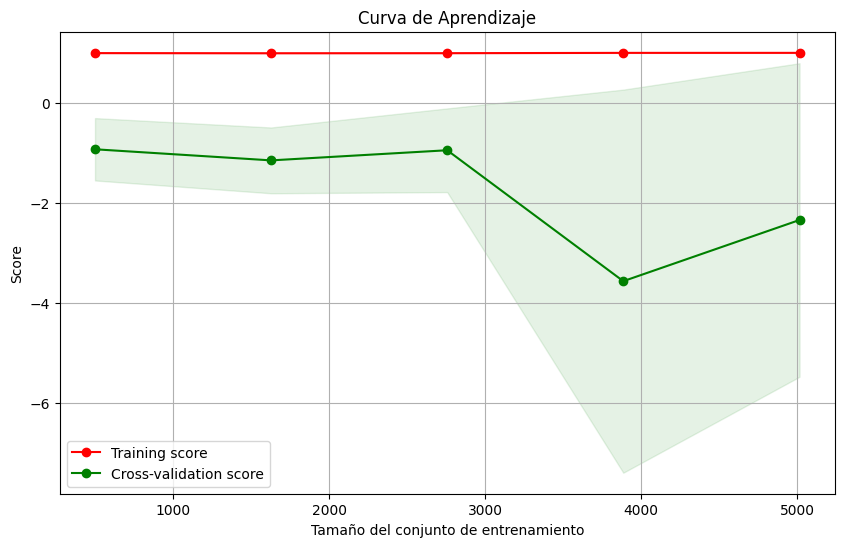

In [103]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

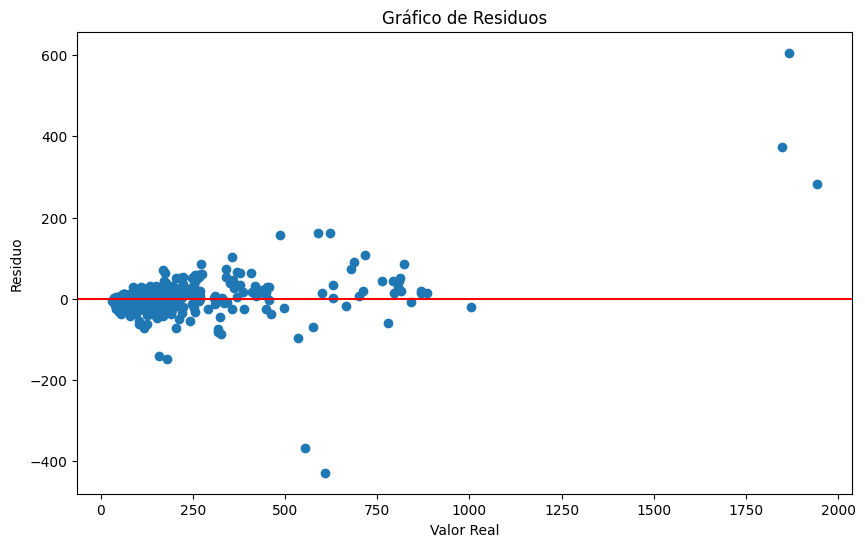

In [104]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

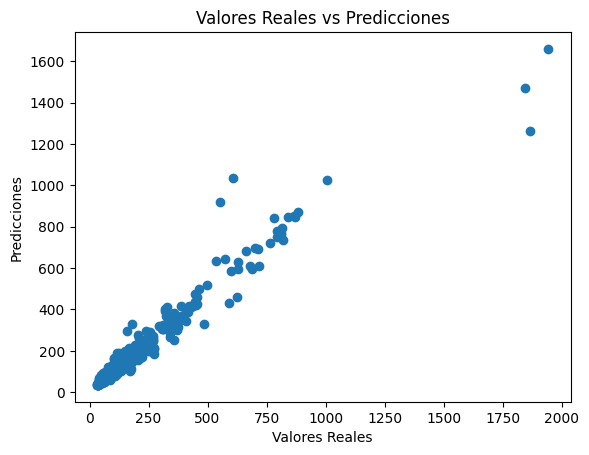

In [105]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

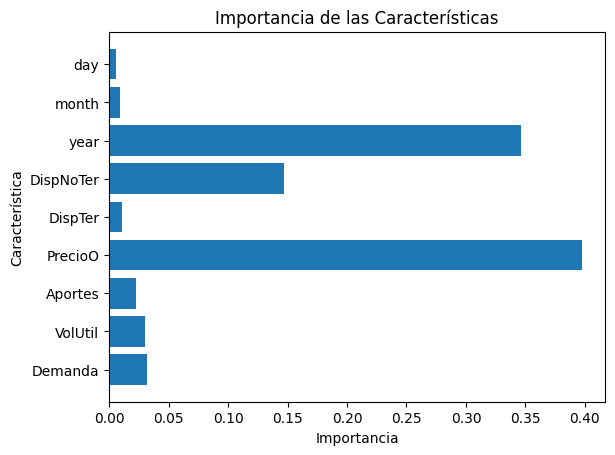

In [106]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [133]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2022-01-01')
end_time_future = pd.to_datetime('2024-05-07')

In [134]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [135]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [136]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 8035 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       851 non-null    datetime64[ns]
 1   Demanda    851 non-null    float64       
 2   VolUtil    851 non-null    float64       
 3   Aportes    851 non-null    float64       
 4   PrecioB    851 non-null    float64       
 5   PrecioO    851 non-null    float64       
 6   DispTer    851 non-null    float64       
 7   DispNoTer  851 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 59.8 KB


In [137]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_14288\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_14288\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_14288\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [138]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [139]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 8035 to 8885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    851 non-null    float64
 1   VolUtil    851 non-null    float64
 2   Aportes    851 non-null    float64
 3   PrecioO    851 non-null    float64
 4   DispTer    851 non-null    float64
 5   DispNoTer  851 non-null    float64
 6   year       851 non-null    int32  
 7   month      851 non-null    int32  
 8   day        851 non-null    int32  
dtypes: float64(6), int32(3)
memory usage: 56.5 KB


In [140]:
predicciones_futuras = best_model.predict(df_future2)

In [141]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [ 239.96953869  242.22335844  255.90195553  251.31195019  269.55784992
  263.49055042  366.54616383  261.4555415   262.31403442  284.44448764
  301.25979408  291.09881936  274.7197695   255.42607347  271.24944944
  291.58274883  266.86486714  300.72364047  388.37136839  434.21545428
  410.00218286  403.64408925  402.42960139  411.05317628  560.93011819
  598.36691372  612.03201408  632.14271719  632.68543744  589.57480139
  633.79585386  684.29502322  810.58345881  716.51495167  674.04025842
  693.57105369  629.75588819  662.12272647  642.38875475  579.05700492
  607.52175672  579.55517072  581.62550942  601.96683233  577.33577839
  584.28890736  587.00785911  591.82402578  572.13333831  571.49807783
  568.637953    489.53963767  394.52977786  368.20498944  346.83635539
  369.21686606  361.04572261  348.98592992  363.61957672  404.35710506
  367.51293836  346.28070619  345.86590872  336.88776728  316.31649028
  348.18428117  353.0

In [142]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [143]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
8035  2022      1    1          239.969539
8036  2022      1    2          242.223358
8037  2022      1    3          255.901956
8038  2022      1    4          251.311950
8039  2022      1    5          269.557850
...    ...    ...  ...                 ...
8881  2024      4   26          615.123915
8882  2024      4   27          612.377199
8883  2024      4   28          579.727837
8884  2024      4   29          561.189579
8885  2024      4   30          549.532268

[851 rows x 4 columns]


In [144]:
precio_real = df_DataModel[df_DataModel['Date'] == '2024-02-28']
print(precio_real)

           Date       Demanda       VolUtil     Aportes     PrecioB  \
8823 2024-02-28  9.746933e+06  7.693937e+09  60294700.0  472.170985   

         PrecioO       DispTer     DispNoTer  
8823  536.657562  5.262121e+06  9.531281e+06  


In [145]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 358.23894690321544


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [146]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: -0.6075055031067575


In [149]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

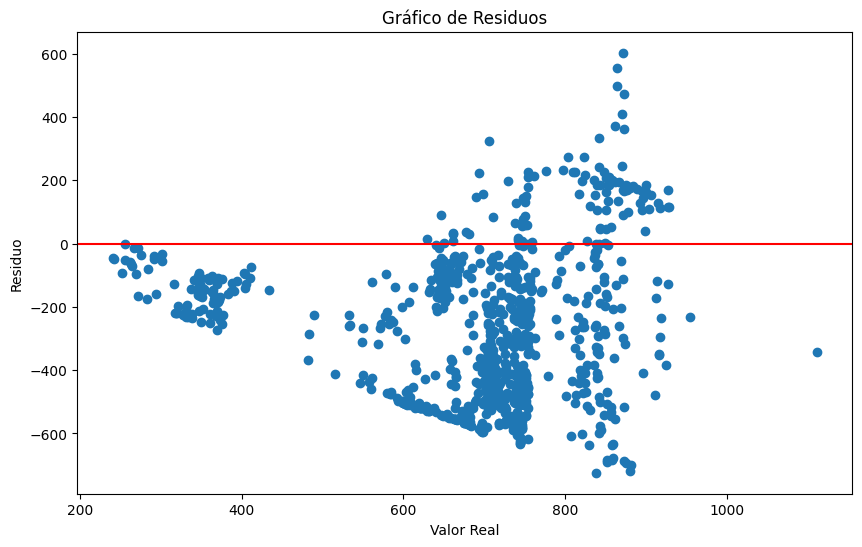

In [150]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(predicciones_futuras, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

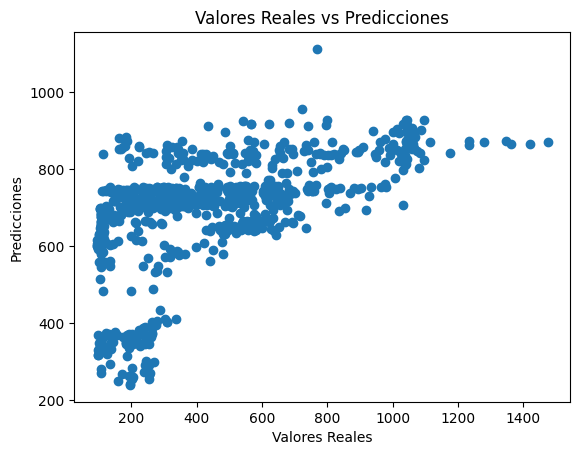

In [151]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(precioB_future, predicciones_futuras)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [152]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 8035 to 8885
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    851 non-null    float64
 1   VolUtil    851 non-null    float64
 2   Aportes    851 non-null    float64
 3   PrecioB    851 non-null    float64
 4   PrecioO    851 non-null    float64
 5   DispTer    851 non-null    float64
 6   DispNoTer  851 non-null    float64
 7   year       851 non-null    int32  
 8   month      851 non-null    int32  
 9   day        851 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 63.2 KB


In [153]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [154]:
df_predicciones.head()

,Prediccion_PrecioB,Date
8035,239.969539,2022-01-01
8036,242.223358,2022-01-02
8037,255.901956,2022-01-03
8038,251.311950,2022-01-04
8039,269.557850,2022-01-05


In [155]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [156]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 8035 to 8885
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  851 non-null    float64       
 1   Date                851 non-null    datetime64[ns]
 2   PrecioB_future      851 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 26.6 KB


In [157]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
8035,239.969539,2022-01-01,195.055977
8036,242.223358,2022-01-02,194.680778
8037,255.901956,2022-01-03,203.051368
8038,251.311950,2022-01-04,159.515553
8039,269.557850,2022-01-05,171.876973
8040,263.490550,2022-01-06,191.554910
8041,366.546164,2022-01-07,197.325273
8042,261.455542,2022-01-08,203.707903
8043,262.314034,2022-01-09,199.222247
8044,284.444488,2022-01-10,203.038690


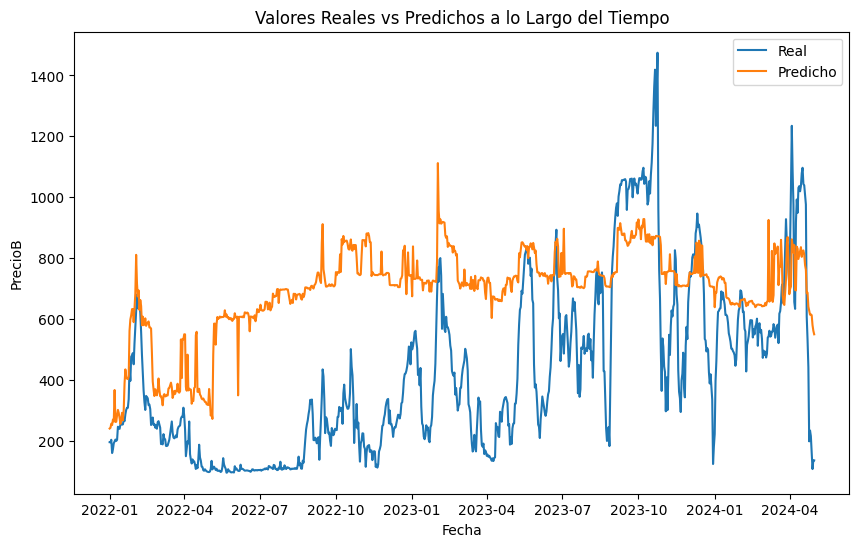

: 

In [158]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()